In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# !wget  'https://github.com/jbrownlee/Datasets/releases/download/Flickr8k/Flickr8k_Dataset.zip'

In [ ]:
#!unzip 'Flickr8k_Dataset.zip' -d '/content/drive/MyDrive/Caption Generator/caption generator/images'

In [2]:
import numpy as np
import pandas as pd
import cv2
import os
from glob import glob

In [3]:
import keras
from keras.applications.resnet50 import ResNet50
from keras.preprocessing.image import img_to_array
from keras.preprocessing import image

In [4]:
img = image.load_img('/content/drive/MyDrive/Caption Generator/caption generator/images/Flicker8k_Dataset/3584829998_25e59fdef3.jpg', target_size = (224, 224))

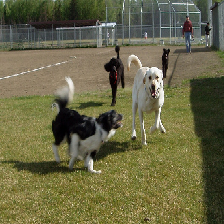

In [5]:
img

In [6]:
images_path = '/content/drive/MyDrive/Caption Generator/caption generator/images/Flicker8k_Dataset/'
images = glob(images_path+'*.jpg')
len(images)
type(images)

list

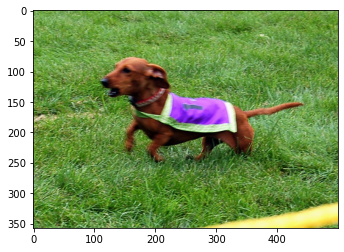

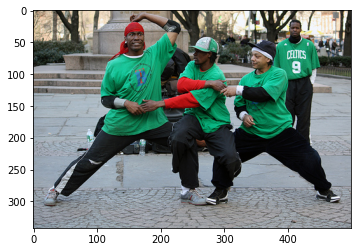

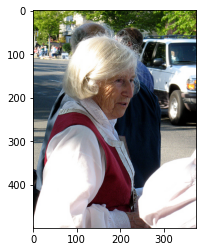

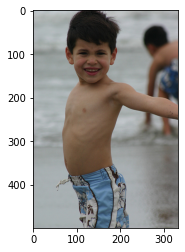

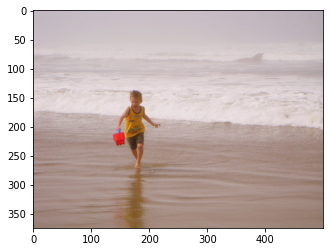

In [7]:
import matplotlib.pyplot as plt

for i in range(5):
    plt.figure()
    img = cv2.imread(images[i])
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)


In [8]:
incept_model = ResNet50(include_top=True)

102973440/102967424 [==============================] - 6s 0us/step


In [9]:
from keras.models import Model
last = incept_model.layers[-2].output
modele = Model(inputs = incept_model.input,outputs = last)
modele.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
______________________________________________________________________________________________

Extracting features of 2000 photographs through ResNet model 

In [39]:
images_features = {}
count = 0
for i in images:
    img = cv2.imread(i)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (224,224))
    
    img = img.reshape(1,224,224,3)
    pred = modele.predict(img).reshape(2048,)
        
    img_name = i.split('/')[-1]
    
    images_features[img_name] = pred
    
    count += 1
    
    if count > 1499:
        break
        
    elif count % 50 == 0:
        print(count)

50
100
150
200
250
300
350
400
450
500
550
600
650
700
750
800
850
900
950
1000
1050
1100
1150
1200
1250
1300
1350
1400
1450


In [40]:
captionpath='/content/drive/MyDrive/Caption Generator/caption generator/Flickr8k.token.txt'

In [41]:
captions = open(captionpath, 'rb').read().decode('utf-8').split('\n') #Extracting captions from token dataset in 'captions' list
type(captions)

list

In [42]:
len(captions)

40461

In [46]:
i="6.jpg"
img=cv2.imread(i)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.resize(img, (224,224))
img = img.reshape(1,224,224,3)
pred = modele.predict(img).reshape(2048,)
images_features[i]=pred

In [47]:
len(images_features)

1503

Getting captions for the images present in 'images_features' dictionary

In [43]:
captions_dict = {}
for i in captions:
    try:
        img_name = i.split('\t')[0][:-2] 
        caption = i.split('\t')[1]
        if img_name in images_features:
            if img_name not in captions_dict:
                captions_dict[img_name] = [caption]
                
            else:
                captions_dict[img_name].append(caption)
            
    except:
        pass

In [48]:
captions_dict['1.jpg']=['A guy in the black cap','A man is taking a selfie',"A man wearing a white jacket",'A man is looking at the camera','A man is smiling']

In [49]:
captions_dict['3.jpg']=['A guy in the red cap','A man is taking a selfie',"A man wearing a black jacket",'A man is looking at the camera','A man is smiling']

In [50]:
captions_dict['6.jpg']=['A guy in the black shirt','A man with a Beard',"A man is taking selfie",'A man is looking at the camera','A man is smiling']

In [15]:
count=0
for i,j in captions_dict.items():
  print(i,'::',j[0:2])
  count=count+1
  if(count>5):
    break

1020651753_06077ec457.jpg :: ['a black and white dog jumping in the air to get a toy .', 'A black and white dog jumps up towards a yellow toy .']
106490881_5a2dd9b7bd.jpg :: ['A boy in his blue swim shorts at the beach .', 'A boy smiles for the camera at a beach .']
1204996216_71d7519d9a.jpg :: ['A boy lays on a picnic table bench .', 'A child is laying down on a wooden bench .']
1213336750_2269b51397.jpg :: ['A man in a black jacket is taking a photo of a man in a red jacket .', 'A man in a black outfit is taking a photograph of a man in a red jacket .']
1240297429_c36ae0c58f.jpg :: ['A dog in a number six jersey is running through a field .', 'A dog is leaping through the grass .']
1321949151_77b77b4617.jpg :: ['A little boy and a little girl are lying on a black bench surrounded by adults .', 'People at a museum standing by benches with two children laying down and one person sitting .']


In [51]:
len(captions_dict)

1503

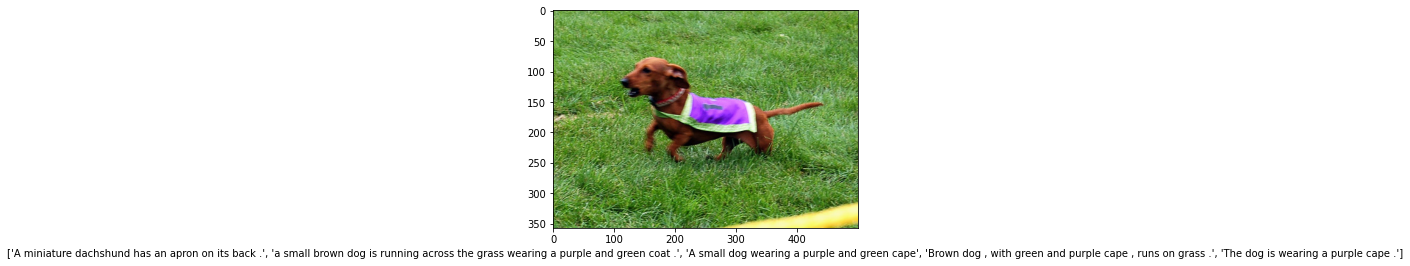

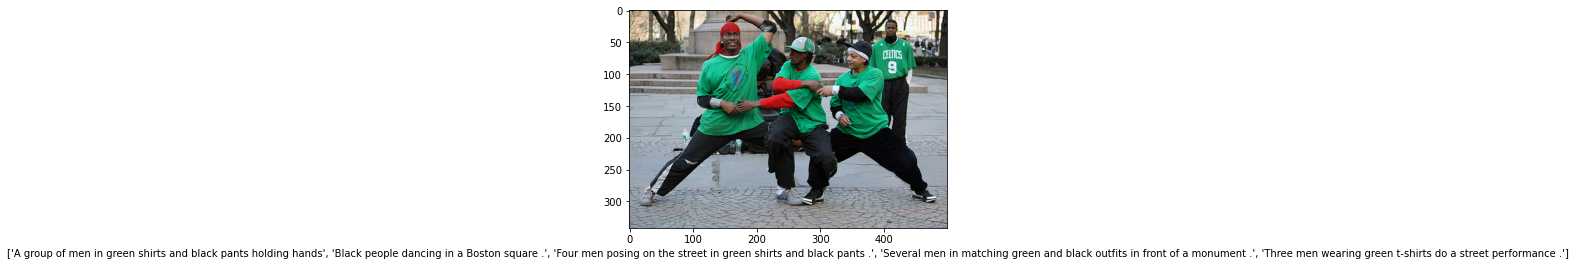

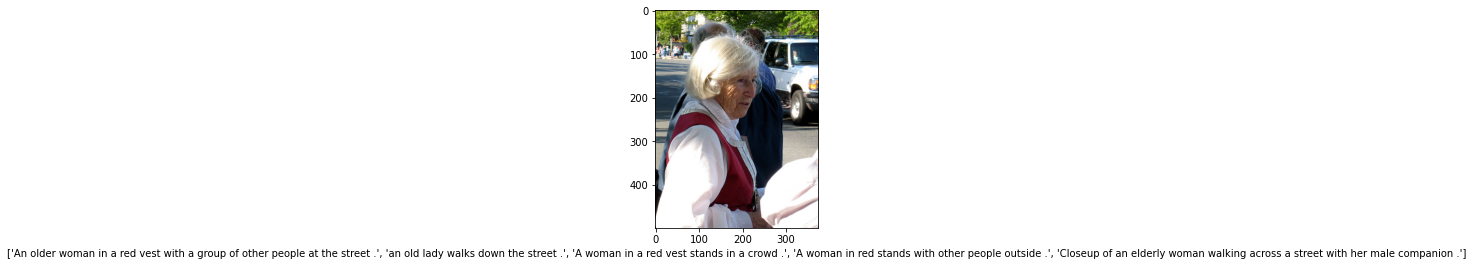

In [52]:
import matplotlib.pyplot as plt

for i in range(3):
    plt.figure()
    img_name = images[i]
    
    
    img = cv2.imread(img_name)
    
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.xlabel(captions_dict[img_name.split('/')[-1]])
    plt.imshow(img)


In [53]:
def preprocessed(txt):
    modified = txt.lower()
    modified = 'startofseq ' + modified + ' endofseq' #adding 'startofseq' and 'endofseq' in order to tell model the starting and ending of a caption.
    return modified

In [54]:
for k,v in captions_dict.items():
    for vv in v:
        captions_dict[k][v.index(vv)] = preprocessed(vv)

In [55]:
count=0
for i,j in captions_dict.items():
  print(i,'::',j[0:2])
  count=count+1
  if(count>5):
    break

1012212859_01547e3f17.jpg :: ['startofseq a dog shakes its head near the shore , a red ball next to it . endofseq', 'startofseq a white dog shakes on the edge of a beach with an orange ball . endofseq']
1015584366_dfcec3c85a.jpg :: ['startofseq a black dog leaps over a log . endofseq', 'startofseq a grey dog is leaping over a fallen tree . endofseq']
101654506_8eb26cfb60.jpg :: ['startofseq a brown and white dog is running through the snow . endofseq', 'startofseq a dog is running in the snow endofseq']
1016887272_03199f49c4.jpg :: ['startofseq a collage of one person climbing a cliff . endofseq', 'startofseq a group of people are rock climbing on a rock climbing wall . endofseq']
1019604187_d087bf9a5f.jpg :: ['startofseq a dog prepares to catch a thrown object in a field with nearby cars . endofseq', 'startofseq a white dog is about to catch a yellow ball in its mouth . endofseq']
1020651753_06077ec457.jpg :: ['startofseq a black and white dog jumping in the air to get a toy . endofse

Getting the frequency of a every words present in 'caption_dict' 

In [56]:
count_words = {}
for k,vv in captions_dict.items():
    for v in vv:
        for word in v.split():
            if word not in count_words:

                count_words[word] = 0

            else:
                count_words[word] += 1

In [57]:
len(count_words)

3999

In [58]:
count=0
for i,j in count_words.items():
  print(i,'::',j)
  count=count+1
  if(count>5):
    break

startofseq :: 7514
a :: 11816
dog :: 1490
shakes :: 9
its :: 160
head :: 67


Giving a unique label to the words present in 'count_words'

In [59]:
THRESH = -1
count = 1
new_dict = {}
for k,v in count_words.items():
    if count_words[k] > THRESH:
        new_dict[k] = count
        count += 1

In [60]:
count=0
for i,j in new_dict.items():
  print(i,'::',j)
  count=count+1
  if(count>5):
    break

startofseq :: 1
a :: 2
dog :: 3
shakes :: 4
its :: 5
head :: 6


In [61]:
len(new_dict)

3999

In [62]:
new_dict['<OUT>'] = len(new_dict) 

captions_backup = captions_dict.copy()

captions_dict = captions_backup.copy()

Converting that 'captions_dict' captions into a encoded form. 

In [63]:
for k, vv in captions_dict.items():
    for v in vv:
        encoded = []
        for word in v.split():  
            if word not in new_dict:
                encoded.append(new_dict['<OUT>'])
            else:
                encoded.append(new_dict[word])

        captions_dict[k][vv.index(v)] = encoded

In [64]:
encoded[0:5]

[1, 2, 73, 44, 275]

In [65]:
count=0
for i,j in captions_dict.items():
  print(i,"::",j)
  count=count+1
  if(count>5):
    break

1012212859_01547e3f17.jpg :: [[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 2, 11, 12, 13, 14, 15, 16, 17], [1, 2, 18, 3, 4, 19, 8, 20, 21, 2, 22, 23, 24, 25, 12, 16, 17], [1, 3, 23, 25, 12, 26, 27, 10, 28, 19, 9, 29, 30, 31, 17], [1, 18, 3, 32, 23, 2, 11, 12, 19, 8, 9, 7, 8, 31, 16, 17], [1, 18, 3, 23, 33, 34, 35, 7, 31, 23, 6, 36, 14, 37, 38, 16, 17]]
1015584366_dfcec3c85a.jpg :: [[1, 2, 39, 3, 40, 41, 2, 42, 16, 17], [1, 2, 43, 3, 44, 45, 41, 2, 46, 47, 16, 17], [1, 2, 48, 39, 3, 40, 2, 46, 42, 16, 17], [1, 2, 49, 39, 50, 43, 3, 51, 2, 52, 53, 54, 41, 2, 46, 47, 16, 17], [1, 8, 39, 3, 55, 8, 47, 56, 16, 17]]
101654506_8eb26cfb60.jpg :: [[1, 2, 33, 50, 18, 3, 44, 57, 58, 8, 59, 16, 17], [1, 2, 3, 44, 57, 51, 8, 59, 17], [1, 2, 3, 57, 58, 59, 16, 17], [1, 2, 18, 50, 33, 3, 44, 57, 58, 2, 59, 60, 61, 16, 17], [1, 8, 18, 50, 33, 3, 44, 57, 41, 8, 62, 21, 8, 59, 16, 17]]
1016887272_03199f49c4.jpg :: [[1, 2, 63, 21, 37, 64, 65, 2, 66, 16, 17], [1, 2, 67, 21, 68, 69, 70, 65, 19, 2, 70, 65, 71, 16, 17], 

In [66]:
from keras.utils import to_categorical
from keras.preprocessing.sequence import pad_sequences

Getting the length of maximum caption in the caption_dict 

In [67]:
MAX_LEN = 0
for k, vv in captions_dict.items():
    for v in vv:
        if len(v) > MAX_LEN:
            MAX_LEN = len(v)
            print(v)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 2, 11, 12, 13, 14, 15, 16, 17]
[1, 83, 76, 51, 2, 84, 69, 65, 8, 70, 72, 8, 73, 51, 11, 85, 50, 86, 8, 87, 16, 17]
[1, 2, 73, 206, 19, 2, 207, 51, 2, 200, 201, 208, 2, 33, 209, 50, 2, 95, 210, 23, 24, 211, 212, 16, 17]
[1, 2, 73, 51, 2, 52, 142, 10, 732, 374, 50, 2, 350, 733, 193, 51, 255, 21, 2, 734, 665, 735, 224, 736, 16, 17]
[1, 37, 302, 23, 2, 877, 876, 19, 345, 6, 10, 44, 155, 2, 11, 878, 434, 23, 2, 879, 50, 781, 10, 72, 345, 880, 23, 2, 374, 149, 19, 16, 17]
[1, 72, 37, 18, 3, 44, 199, 8, 271, 10, 80, 18, 3, 23, 2, 39, 1259, 19, 5, 577, 44, 54, 278, 2, 647, 191, 271, 72, 318, 2186, 165, 2, 1399, 998, 16, 17]


X contains the photograph name , y_in contains each sentence in sperated format and y_out contains the next word attached to it.

In [68]:
Batch_size = 5000
VOCAB_SIZE = len(new_dict)

def generator(photo, caption):
    n_samples = 0
    
    X = []
    y_in = []
    y_out = []
    
    for k, vv in caption.items():
        for v in vv:
            for i in range(1, len(v)):
                X.append(photo[k])

                in_seq= [v[:i]]
                out_seq = v[i]

                in_seq = pad_sequences(in_seq, maxlen=MAX_LEN, padding='post', truncating='post')[0]
                out_seq = to_categorical([out_seq], num_classes=VOCAB_SIZE)[0]

                y_in.append(in_seq)
                y_out.append(out_seq)
            
    return X, y_in, y_out
    

In [69]:
X, y_in, y_out = generator(images_features, captions_dict)

In [70]:
len(X), len(y_in), len(y_out)

(96405, 96405, 96405)

In [71]:
X = np.array(X)
y_in = np.array(y_in, dtype='float64')
y_out = np.array(y_out, dtype='float64')

In [72]:
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from keras.models import Model, Sequential
from keras.layers import Input
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Embedding
from keras.layers import Dropout
from keras.layers.merge import add
from keras.callbacks import ModelCheckpoint
from keras.layers import Dense, Flatten,Input, Convolution2D, Dropout, LSTM, TimeDistributed, Embedding, Bidirectional, Activation, RepeatVector,Concatenate

In [73]:
embedding_size = 128
max_len = MAX_LEN
vocab_size = len(new_dict)

image_model = Sequential()

image_model.add(Dense(embedding_size, input_shape=(2048,), activation='relu'))
image_model.add(RepeatVector(max_len))

image_model.summary()

language_model = Sequential()

language_model.add(Embedding(input_dim=vocab_size, output_dim=embedding_size, input_length=max_len))
language_model.add(LSTM(256, return_sequences=True))
language_model.add(TimeDistributed(Dense(embedding_size)))

language_model.summary()

conca = Concatenate()([image_model.output, language_model.output])
x = LSTM(128, return_sequences=True)(conca)
x = LSTM(512, return_sequences=False)(x)
x = Dense(vocab_size)(x)
out = Activation('softmax')(x)
model = Model(inputs=[image_model.input, language_model.input], outputs = out)

 
model.compile(loss='categorical_crossentropy', optimizer='RMSprop', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               262272    
_________________________________________________________________
repeat_vector (RepeatVector) (None, 36, 128)           0         
Total params: 262,272
Trainable params: 262,272
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 36, 128)           512000    
_________________________________________________________________
lstm (LSTM)                  (None, 36, 256)           394240    
_________________________________________________________________
time_distributed (TimeDistri (None, 36, 128)           32896     
Total params: 939,136
Traina

In [74]:
#model.load_weights("/content/drive/MyDrive/caption generator/modelweights.h5")

In [75]:
MAX_LEN

36

In [77]:
model.fit([X, y_in], y_out, batch_size=512, epochs=50)

Epoch 1/50
189/189 [==============================] - 34s 177ms/step - loss: 3.5801 - accuracy: 0.3313
Epoch 2/50
189/189 [==============================] - 33s 177ms/step - loss: 3.4221 - accuracy: 0.3491
Epoch 3/50
189/189 [==============================] - 33s 177ms/step - loss: 3.2991 - accuracy: 0.3636
Epoch 4/50
189/189 [==============================] - 33s 177ms/step - loss: 3.1852 - accuracy: 0.3758
Epoch 5/50
189/189 [==============================] - 33s 177ms/step - loss: 3.0885 - accuracy: 0.3857
Epoch 6/50
189/189 [==============================] - 33s 177ms/step - loss: 2.9941 - accuracy: 0.3974
Epoch 7/50
189/189 [==============================] - 33s 177ms/step - loss: 2.9089 - accuracy: 0.4086
Epoch 8/50
189/189 [==============================] - 33s 177ms/step - loss: 2.8327 - accuracy: 0.4191
Epoch 9/50
189/189 [==============================] - 33s 177ms/step - loss: 2.7519 - accuracy: 0.4290
Epoch 10/50
189/189 [==============================] - 33s 177ms/step - l

KeyboardInterrupt: ignored

In [ ]:
model.save('/content/drive/MyDrive/Caption Generator/caption generator/model.h5')
model.save_weights('/content/drive/MyDrive/Caption Generator/caption generator/modelweights.h5')
np.save('/content/drive/MyDrive/Caption Generator/caption generator/vocab.npy', new_dict)

In [89]:
def getImage(x):
    
    test_img_path = '3.jpg'

    test_img = cv2.imread(test_img_path)
    test_img = cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB)

    test_img = cv2.resize(test_img, (224,224))

    test_img = np.reshape(test_img, (1,224,224,3))
    
    return test_img

In [79]:
inv_dict = {v:k for k, v in new_dict.items()}

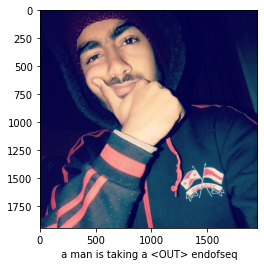

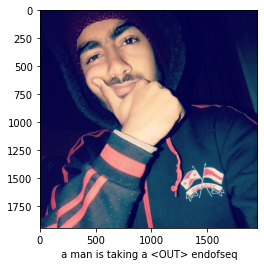

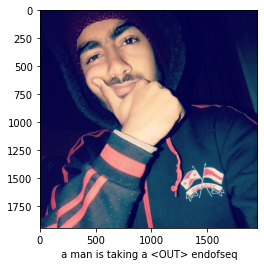

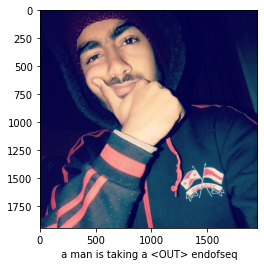

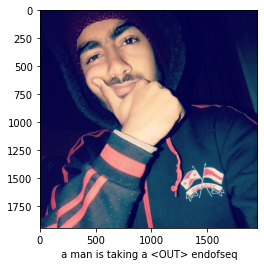

In [90]:
for i in range(5):
    
    no = np.random.randint(1000,8000,(1,1))[0,0]
    test_feature = modele.predict(getImage(no)).reshape(1,2048)
    
    test_img_path = '3.jpg'
    test_img = cv2.imread(test_img_path)
    test_img = cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB)


    text_inp = ['startofseq']

    count = 0
    caption = ''
    while count < 25:
        count += 1

        encoded = []
        for i in text_inp:
            encoded.append(new_dict[i])

        encoded = [encoded]

        encoded = pad_sequences(encoded, padding='post', truncating='post', maxlen=MAX_LEN)


        prediction = np.argmax(model.predict([test_feature, encoded]))

        sampled_word = inv_dict[prediction]

        caption = caption + ' ' + sampled_word
            
        if sampled_word == 'endofseq':
            break

        text_inp.append(sampled_word)
        
    plt.figure()
    plt.imshow(test_img)
    plt.xlabel(caption)